- feature: pclass, sex, fare
- label: survived

1. 1등급, female, 32달러 인경우 생사유무를 예측하시요
( voting , bagging, boost, deep learning 을 이용하시요) 
2. 위의 모델의 train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_csv('./titanic.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
x_data = data.loc[:,['Pclass' , 'Sex' , 'Fare']]
y_data = data.loc[:,'Survived']
le = LabelEncoder()


x_data['Sex'] = le.fit_transform(x_data['Sex'])

mm_x = MinMaxScaler()
x_data['Fare'] = mm_x.fit_transform(np.array(x_data['Fare']).reshape(-1,1))

x_data = pd.get_dummies(x_data)
print(x_data)

     Pclass  Sex      Fare
0         3    1  0.014151
1         1    0  0.139136
2         3    0  0.015469
3         1    0  0.103644
4         3    1  0.015713
..      ...  ...       ...
886       2    1  0.025374
887       1    0  0.058556
888       3    0  0.045771
889       1    1  0.058556
890       3    1  0.015127

[891 rows x 3 columns]


In [3]:
from sklearn.model_selection import train_test_split

x_pred = pd.DataFrame([1,'female',32.0]).T
x_pred.columns = x_data.columns
x_pred['Sex'] = le.transform(x_pred['Sex'])
x_pred

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)

In [4]:
from sklearn import ensemble
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
LR = LogisticRegression(random_state=10,n_jobs=2,max_iter=1000,l1_ratio=0.1)
BNB = BernoulliNB()
ETC = ExtraTreeClassifier()

vote = ensemble.VotingClassifier(estimators=[('LogisticRegression',LR),('BernoulliNB',BNB),('ExtraTreeClassifier',ETC)],voting='soft')

In [6]:
vote.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(l1_ratio=0.1, max_iter=1000,
                                                 n_jobs=2, random_state=10)),
                             ('BernoulliNB', BernoulliNB()),
                             ('ExtraTreeClassifier', ExtraTreeClassifier())],
                 voting='soft')

In [8]:
def model_predict(model):
    y_pred = model.predict(x_pred)
    result = '생존' if y_pred[0] else '사망'
    print(f'예측결과는 ===> {result}')

In [29]:
from sklearn.metrics import f1_score
print(vote.score(x_test,y_test))
f1_score(y_test,vote.predict(x_test))

0.7653631284916201


0.6666666666666667

In [9]:
model_predict(vote)

예측결과는 ===> 생존


In [10]:
RF = ensemble.RandomForestClassifier(n_estimators=1000, n_jobs=3)

RF.fit(x_train,y_train)
print(RF.score(x_test,y_test))

print(f1_score(y_test,RF.predict(x_test)))

model_predict(RF)

0.770949720670391
0.6917293233082707
예측결과는 ===> 생존


In [11]:
XGB = XGBClassifier(n_jobs=3)

In [12]:
XGB.fit(x_train,y_train)

[09:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=3, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
print(XGB.score(x_test,y_test))

print(f1_score(y_test,XGB.predict(x_test)))
model_predict(XGB)

0.776536312849162
0.6875
예측결과는 ===> 생존


In [14]:
MLP = MLPClassifier(hidden_layer_sizes=(64,32)
                      ,verbose=1
                      ,max_iter=1000
                      ,early_stopping=True)
MLP.fit(x_train,y_train)

print(MLP.score(x_test,y_test))

print(f1_score(y_test,MLP.predict(x_test)))
model_predict(MLP)

Iteration 1, loss = 0.68163121
Validation score: 0.611111
Iteration 2, loss = 0.66195886
Validation score: 0.611111
Iteration 3, loss = 0.64893119
Validation score: 0.611111
Iteration 4, loss = 0.63841174
Validation score: 0.611111
Iteration 5, loss = 0.63027205
Validation score: 0.611111
Iteration 6, loss = 0.62157644
Validation score: 0.611111
Iteration 7, loss = 0.61411929
Validation score: 0.611111
Iteration 8, loss = 0.60734820
Validation score: 0.625000
Iteration 9, loss = 0.60096547
Validation score: 0.625000
Iteration 10, loss = 0.59458607
Validation score: 0.638889
Iteration 11, loss = 0.58829386
Validation score: 0.666667
Iteration 12, loss = 0.58165658
Validation score: 0.680556
Iteration 13, loss = 0.57453857
Validation score: 0.680556
Iteration 14, loss = 0.56714940
Validation score: 0.680556
Iteration 15, loss = 0.55933282
Validation score: 0.680556
Iteration 16, loss = 0.55206627
Validation score: 0.680556
Iteration 17, loss = 0.54395344
Validation score: 0.708333
Iterat

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
vote_conf = confusion_matrix(y_test,vote.predict(x_test))

In [17]:
rf_conf = confusion_matrix(y_test,RF.predict(x_test))

In [18]:
xgb_conf = confusion_matrix(y_test,XGB.predict(x_test))

In [19]:
mlp_conf = confusion_matrix(y_test,MLP.predict(x_test))

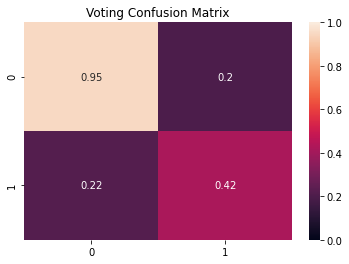

In [20]:
plt.title('Voting Confusion Matrix')
sns.heatmap(vote_conf/100,vmin=0,vmax=1,annot=True)
plt.show()

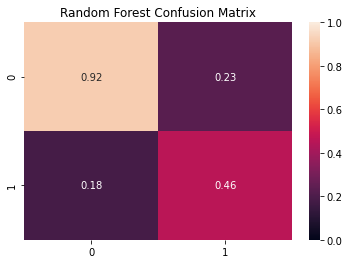

In [21]:
plt.title('Random Forest Confusion Matrix')
sns.heatmap(rf_conf/100,vmin=0,vmax=1,annot=True)
plt.show()

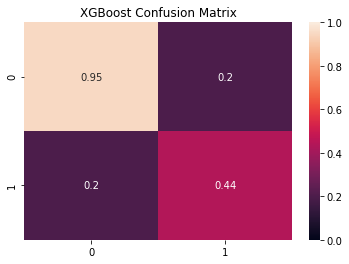

In [22]:
plt.title('XGBoost Confusion Matrix')
sns.heatmap(xgb_conf/100,vmin=0,vmax=1,annot=True)
plt.show()

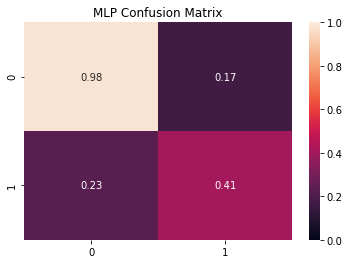

In [23]:
plt.title('MLP Confusion Matrix')
sns.heatmap(mlp_conf/100,vmin=0,vmax=1,annot=True)
plt.show()

In [24]:
from yellowbrick.classifier import ROCAUC

def draw_ROC_curve(model):
    
    visualizer = ROCAUC(model, classes=[0, 1], micro=False, macro=False, per_class=False)
    visualizer.fit(x_train, y_test)
    visualizer.score(x_test, y_test)
    visualizer.show()

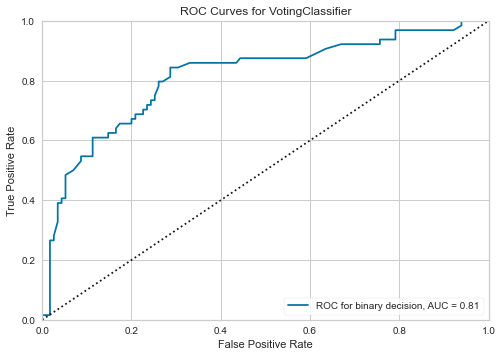

In [25]:
draw_ROC_curve(vote)

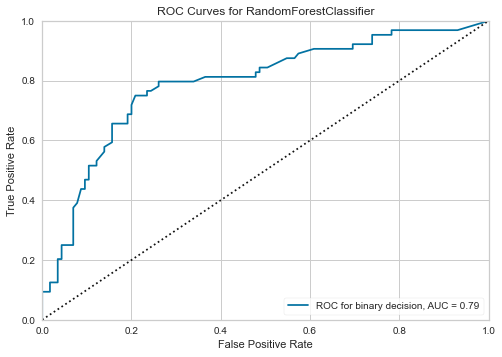

In [26]:
draw_ROC_curve(RF)

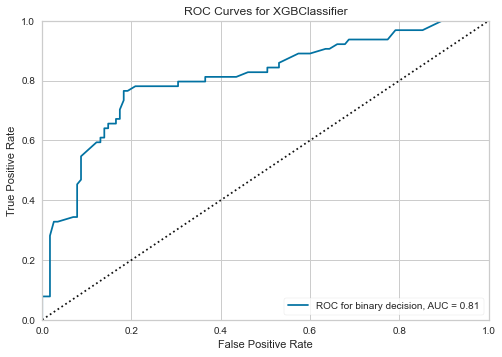

In [27]:
draw_ROC_curve(XGB)

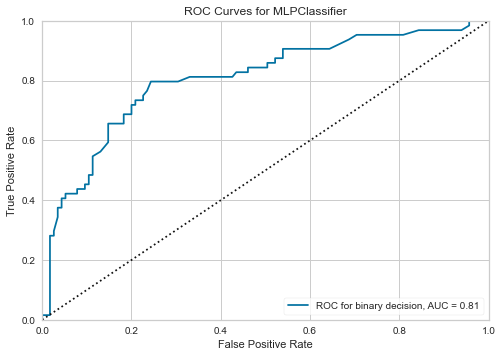

In [28]:
draw_ROC_curve(MLP)